In [3]:
import pickle
from scipy.ndimage.filters import gaussian_filter as GF

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from sklearn.preprocessing import scale, normalize

def extend(m, E):
    C = E+1
    pm = np.pad(m, ((0,0),(C,C)), mode='constant')

    M = np.zeros(m.shape)
    for i in range(1,C):
        M += np.roll(pm,i)[:,C:-C]
    return M

data = pickle.load(open("./mm_M6125.pickle","rb"))

In [80]:
class P():
    def __init__(self, data,keys):
        self.cis = np.array([data[k][1]['wc'] for k in keys], dtype=np.float32).sum(axis=0)
        self.trans = np.array([data[k][1]['wt'] for k in keys], dtype=np.float32).sum(axis=0)
        self.SAM = self.cis +self.trans
    
    def scale(self, axis=1):
        self.cis = scale(self.cis, axis=axis)
        self.trans = scale(self.trans, axis=axis)
        self.SAM = scale(self.SAM, axis=axis)
        return self
    
    def filter(self, ORDER,SIGMA):
        self.cis = GF(self.cis, order=ORDER, sigma=SIGMA)
        self.trans = GF(self.trans, order=ORDER, sigma=SIGMA)
        self.SAM = GF(self.SAM, order=ORDER, sigma=SIGMA)
        return self
        
    def zoom(self, ZOOMR0=0,ZOOMR1=90,ZOOM_O=350 ):
        self.cis = self.cis[ZOOMR0:ZOOMR1,ZOOM_O:-ZOOM_O]
        self.trans = self.trans[ZOOMR0:ZOOMR1,ZOOM_O:-ZOOM_O]
        self.SAM = self.SAM[ZOOMR0:ZOOMR1,ZOOM_O:-ZOOM_O]
        return self

    def plot_1(self, FIGSIZE = (6,6),  lineC='black',faceC='white',PAL=False,PAL_N=100,LINEW=3.66,A=0.33  ):
            if not PAL:
                assert lineC
                assert faceC
                cpal = [lineC for i in range(PAL_N)]
            else:    
                cpal = sns.color_palette(PAL,PAL_N)
                faceC = cpal[0]

            fig = plt.figure(figsize=FIGSIZE,frameon=False)
            ax = plt.Axes(fig, [0., 0., 1., 1.], facecolor=faceC)
            ax.spines['right'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.tick_params(bottom="off", left="off")
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            fig.add_axes(ax)

            c=0

            for i,row in enumerate((self.SAM)[::1]): #[np.random.permutation(len(SAM))]
                ax.plot( row , linewidth=LINEW, alpha= A , c=cpal[i])
        #         c+= 1
            return fig

/home/ska/tools/py3_venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/ska/tools/py3_venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


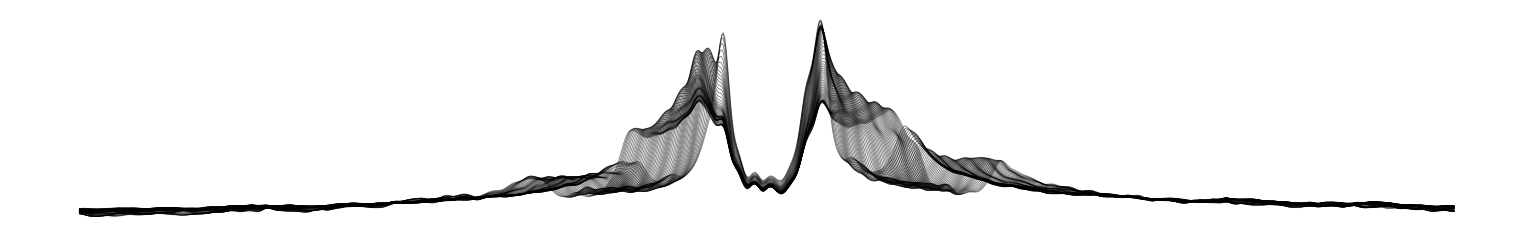

In [81]:
p = P(data,data.keys())
p = (p
        .filter(ORDER=(0,0), SIGMA=(3,3))
        .scale()
        .zoom(ZOOMR0=25,ZOOMR1=90,ZOOM_O=50)
    )
fig = p.plot_1(FIGSIZE=(21,3),lineC='black',faceC='white',PAL=False, PAL_N=100,LINEW=0.88, A=0.5)
fig.savefig("./public/assets/now_long.png", dpi=100)
fig.savefig("./assets/now_long.png", dpi=100)

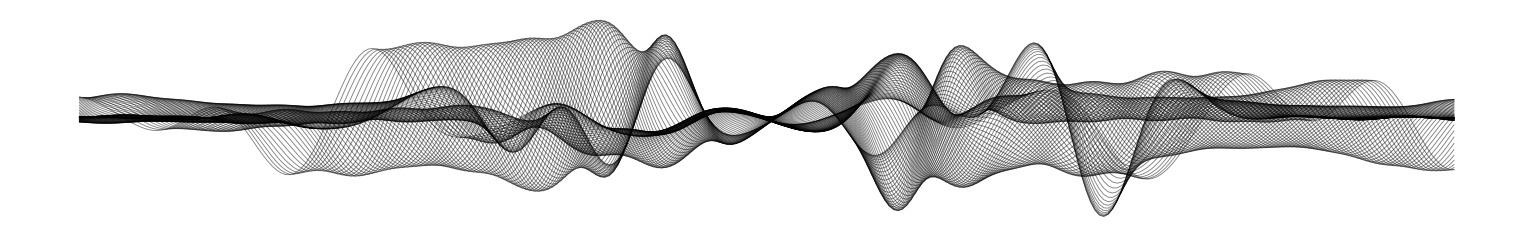

In [19]:
def plot_waw(data, keys, FIGSIZE = (24,24), SIGMA=(9,9), ORDER=(1,1), lineC='black',faceC='white',
             PAL=False, ZOOMR0=0,ZOOMR1=90,ZOOM_O=350,PAL_N=100,LINEW=3.66,A=0.33 ):    
    
    cis = np.array([data[k][1]['wc'] for k in keys], dtype=np.float32).sum(axis=0)
    trans = np.array([data[k][1]['wt'] for k in keys], dtype=np.float32).sum(axis=0)
    SAM = cis +trans
    # SCALE
    SAM = GF(SAM, order=ORDER,sigma=SIGMA)
    SAM = scale(SAM,axis=1)
    #ZOOM IN
    SAM = SAM[ZOOMR0:ZOOMR1,ZOOM_O:-ZOOM_O]

    
    if not PAL:
        assert lineC
        assert faceC
        cpal = [lineC for i in range(PAL_N)]
    else:    
        cpal = sns.color_palette(PAL,PAL_N)
        faceC = cpal[0]
    
    # ax = sns.heatmap(SAM*1000, cmap='Greys')
    # _ = ax.set(xlabel='Distance from center of motif', ylabel='Sequencing fragment length')


    fig = plt.figure(figsize=FIGSIZE,frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.], facecolor=faceC)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.tick_params(bottom="off", left="off")
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    fig.add_axes(ax)
    
    c=0
    
    for i,row in enumerate((SAM)[::1]): #[np.random.permutation(len(SAM))]
        ax.plot( row-c , linewidth=LINEW, alpha= A , c=cpal[i])
#         c+= 1
    return fig

/home/ska/tools/py3_venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:160: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/home/ska/tools/py3_venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


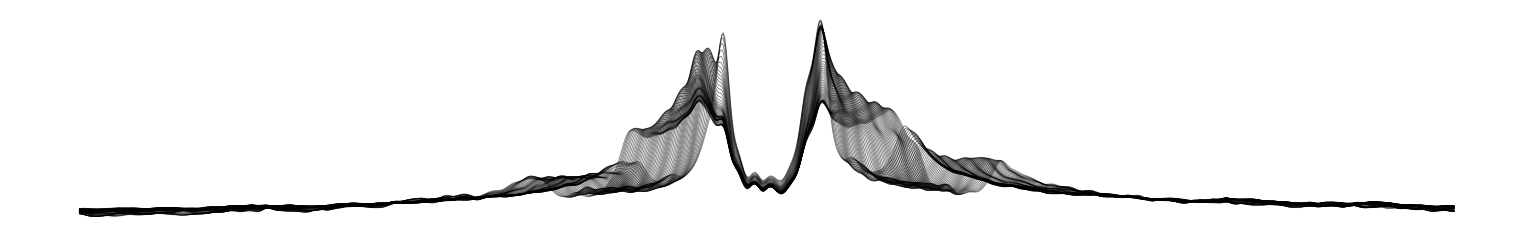

In [24]:
fig  = plot_waw(data, data.keys(),
        SIGMA=(3,3), ORDER=(0,0), 
         FIGSIZE=(21,3),lineC='black',faceC='white',PAL=False, PAL_N=100,LINEW=0.88, A=0.5,
         ZOOMR0=25,ZOOMR1=90,ZOOM_O=50)
fig.savefig("./public/assets/long.png", dpi=100)
fig.savefig("./assets/long.png", dpi=100)

In [23]:
!ls ./public/assets/

long.png


In [31]:
class Test():
    a=1
    def add(self,):
        self.a+=1
        return self

In [32]:
t = Test()

In [33]:
t.add().add().a

3